# 逻辑斯蒂回归

## 【关键词】Logistics函数，最大似然估计，梯度下降法

## 1、Logistics回归的原理

利用Logistics回归进行分类的主要思想是：根据现有数据对分类边界线建立回归公式，以此进行分类。这里的“回归” 一词源于最佳拟合，表示要找到最佳拟合参数集。

训练分类器时的做法就是寻找最佳拟合参数，使用的是最优化算法。接下来介绍这个二值型输出分类器的数学原理

Logistic Regression和Linear Regression的原理是相似的，可以简单的描述为这样的过程：

（1）找一个合适的预测函数，一般表示为h函数，该函数就是我们需要找的分类函数，它用来预测输入数据的判断结果。这个过程是非常关键的，需要对数据有一定的了解或分析，知道或者猜测预测函数的“大概”形式，比如是线性函数还是非线性函数。

（2）构造一个Cost函数（损失函数），该函数表示预测的输出（h）与训练数据类别（y）之间的偏差，可以是二者之间的差（h-y）或者是其他的形式。综合考虑所有训练数据的“损失”，将Cost求和或者求平均，记为J(θ)函数，表示所有训练数据预测值与实际类别的偏差。

（3）显然，J(θ)函数的值越小表示预测函数越准确（即h函数越准确），所以这一步需要做的是找到J(θ)函数的最小值。找函数的最小值有不同的方法，Logistic Regression实现时有梯度下降法（Gradient Descent）。


### 1)  构造预测函数

Logistic Regression虽然名字里带“回归”，但是它实际上是一种分类方法，用于两分类问题（即输出只有两种）。首先需要先找到一个预测函数（h），显然，该函数的输出必须是两类值（分别代表两个类别），所以利用了*Logistic函数（或称为Sigmoid函数）*，函数形式为：

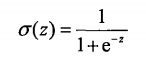

该函数形状为：

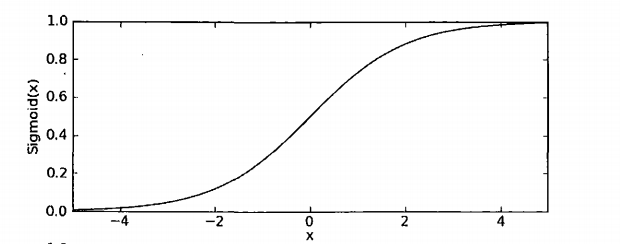

预测函数可以写为：

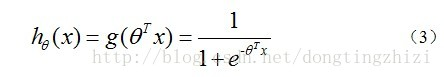

### 2）构造损失函数

Cost函数和J(θ)函数是基于*最大似然估计*推导得到的。

每个样本属于其真实标记的概率，即似然函数，可以写成：

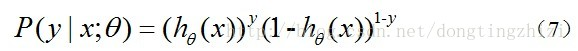

所有样本都属于其真实标记的概率为

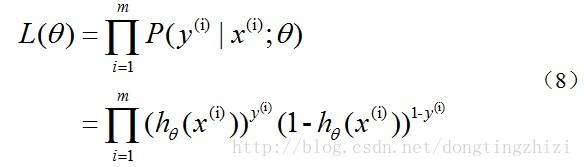

对数似然函数为

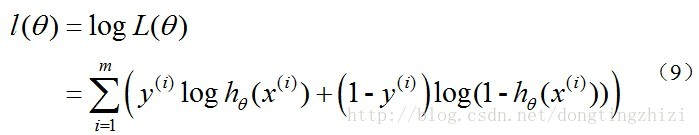

最大似然估计就是要求得使l(θ)取最大值时的θ，其实这里可以使用梯度上升法求解，求得的θ就是要求的最佳参数

### 3) 梯度下降法求J(θ)的最小值

求J(θ)的最小值可以使用*梯度下降法*，根据梯度下降法可得θ的更新过程:

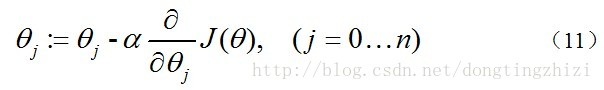

式中为α学习步长，下面来求偏导：

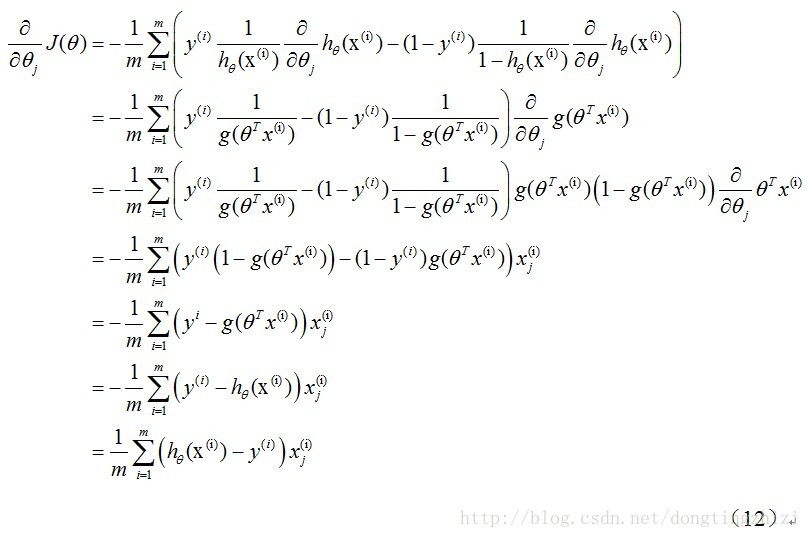

上式求解过程中用到如下的公式：

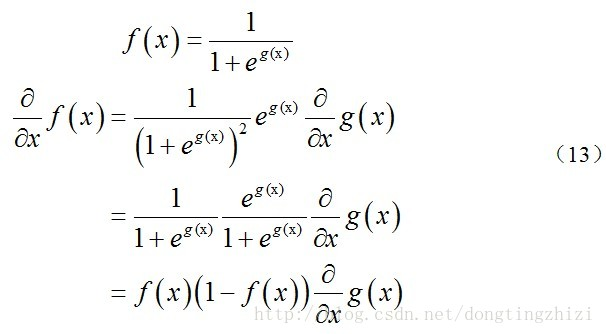

因此，θ的更新过程可以写成:

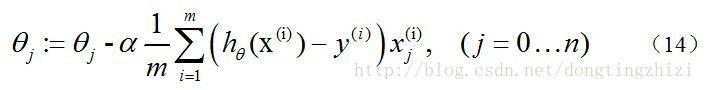

因为式中α本来为一常量，所以1/m一般将省略，所以最终的θ更新过程为：

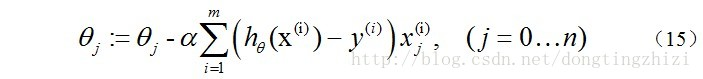

## 2、实战

`
sklearn.linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
`

solver参数的选择：
- “liblinear”：小数量级的数据集
- “lbfgs”, “sag” or “newton-cg”：大数量级的数据集以及多分类问题
- “sag”：极大的数据集

In [ ]:
# 逻辑斯提 Logistic 
# 是一个线性回归模型，处理二分类问题
# 概率论
# 对分类边界建立回归公式
# 不能处理回归问题

### 1) 手写数字数据集的分类

使用KNN与Logistic回归两种方法

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [5]:
train = digits.data
target = digits.target
images = digits.images

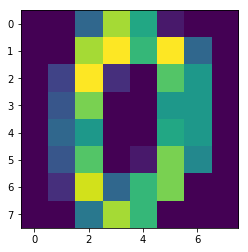

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# plt.imshow(images[0])
plt.imshow(train[0].reshape(8,8))

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train,target)

导入数据load_digits()

In [9]:
from sklearn.linear_model import LogisticRegression

创建模型，训练和预测

In [20]:
logistic = LogisticRegression(C=0.1)

# C惩罚系数 允许误差的阈值
# C越大，允许的误差越大
logistic.fit(X_train,y_train)

y_ = logistic.predict(X_test)

logistic.score(X_test,y_test)

0.9688888888888889

展示结果

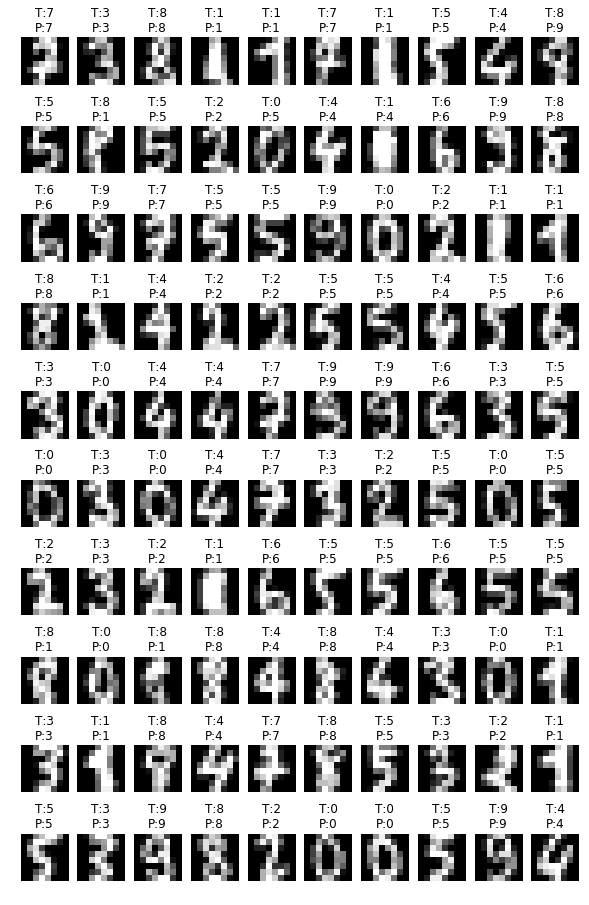

In [24]:
plt.figure(figsize=(10,16))

for i in range(100):
    axes = plt.subplot(10,10,i+1)
    data = X_test[i].reshape(8,8)
    plt.imshow(data,cmap='gray')
    t = y_test[i]
    p = y_[i]
    title = 'T:'+str(t) + '\nP:'+str(p)
    axes.set_title(title)
    axes.axis('off')

### 2) 使用make_blobs产生数据集进行分类

导包使用datasets.make_blobs创建一系列点

In [41]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
import pandas as pd

设置三个中心点，随机创建100个点

In [26]:
train,target = make_blobs(n_samples=150,n_features=2,centers=[[1,4],[3,2],[5,6]])

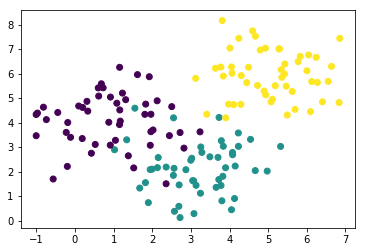

In [40]:
plt.scatter(train[:,0],train[:,1],c=target)

创建机器学习模型，训练数据

In [42]:
logistic = LogisticRegression()
knnclf = KNeighborsClassifier()

logistic.fit(train,target)
knnclf.fit(train,target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

提取坐标点，对坐标点进行处理

In [44]:
# 获取边界
xmin,xmax = train[:,0].min()-0.5, train[:,1].max()+0.5
ymin,ymax = train[:,1].min()-0.5, train[:,1].max()+0.5

In [45]:
# 等差数列
x = np.linspace(xmin,xmax,200)
y = np.linspace(ymin,ymax,200)

In [46]:
# x和y交叉
xx,yy = np.meshgrid(x,y)

In [48]:
X_test = np.c_[xx.ravel(),yy.ravel()]

In [64]:
X_test.shape

(40000, 2)

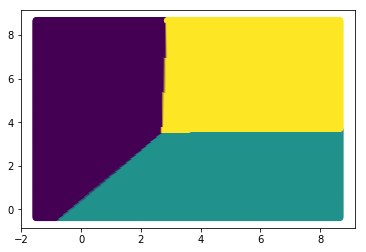

预测坐标点数据，并进行reshape()

In [49]:
%time y1_ = logistic.predict(X_test)

Wall time: 3.97 ms


In [50]:
%time y2_ = knnclf.predict(X_test)

Wall time: 87.2 ms


绘制图形

In [55]:
from matplotlib.colors import ListedColormap


In [70]:
colormap = ListedColormap(['#aa00ff','#00aaff','#aaffff'])

def draw_classifier_bounds(X_train,y_train,X_test,y_test):
    plt.figure(figsize=(10,8))
    axes = plt.subplot(111)
    axes.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=colormap)
    axes.scatter(X_train[:,0],X_train[:,1],c=y_train)

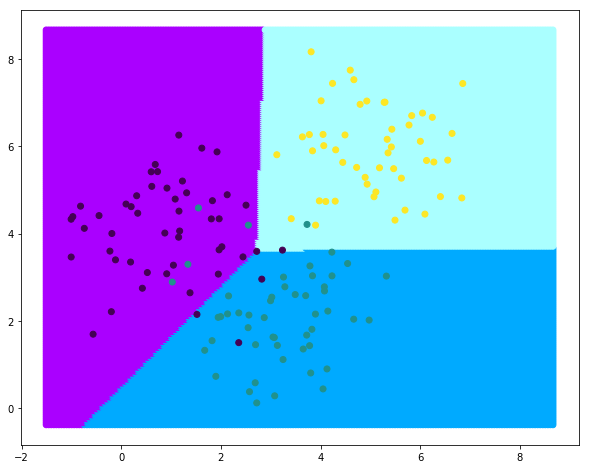

In [71]:
draw_classifier_bounds(train,target,X_test,y1_)

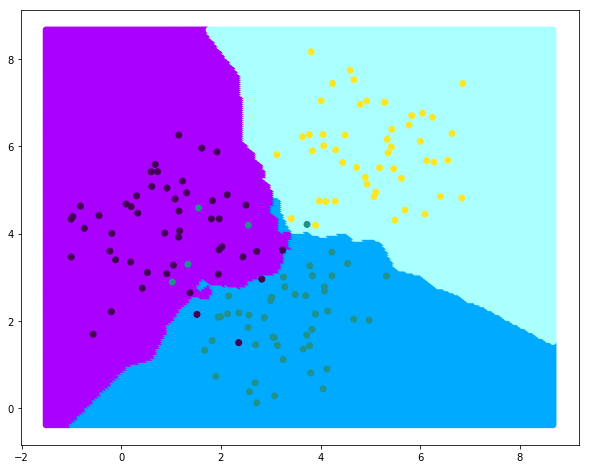

In [72]:
draw_classifier_bounds(train,target,X_test,y2_)

## 3、作业

#### 【第1题】预测年收入是否大于50K美元

读取adult.txt文件，并使用逻辑斯底回归算法训练模型，根据种族、职业、工作时长来预测一个人的性别

In [74]:
samples = pd.read_csv('../data/adults.txt')

In [75]:
samples.head(2)

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [99]:
train = samples[['race','occupation','hours_per_week']].copy()
target = samples['sex']

In [100]:
train['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [101]:
race_dic = {
    'White':0,
    'Black':1, 
    'Asian-Pac-Islander':2,
    'Amer-Indian-Eskimo':3,
    'Other':4
}

In [102]:
train['race'] = train['race'].map(race_dic)

In [104]:
unique_arr = train['occupation'].unique()
def transform_occ(x):
    return np.argwhere(x == unique_arr)[0,0]

In [105]:
train['occupation'] = train['occupation'].map(transform_occ)

In [106]:
train

,race,occupation,hours_per_week
0,0,0,40
1,0,1,13
2,0,2,40
3,1,2,40
4,1,3,40
5,0,1,40
6,1,4,16
7,0,1,45
8,0,3,50
9,0,1,40


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [107]:
X_train,X_test,y_train,y_test = train_test_split(train,target,test_size=0.2,random_state=1)

In [117]:
logistic = LogisticRegression(C=100)
knnclf = KNeighborsClassifier(n_neighbors=9)

logistic.fit(X_train,y_train)
knnclf.fit(X_train,y_train)

y1_ = logistic.predict(X_test)
y2_ = knnclf.predict(X_test)

print('logistic score is %f'%logistic.score(X_test,y_test))
print('knnclf score is %f'%knnclf.score(X_test,y_test))

logistic score is 0.681406
knnclf score is 0.714417


In [121]:
# 由于评分较低，把所有的数据特征都保留

train = samples.drop('sex',axis=1).copy()
target = samples.sex

In [123]:
train.head(2)

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,<=50K


In [129]:
columns = train.columns[train.dtypes == object]
for column in columns:
    unique_arr = train[column].unique()
    def transform_obj(x):
        return np.argwhere(x == unique_arr)[0,0]
    train[column] = train[column].map(transform_obj)

In [130]:
train.dtypes

age               int64
workclass         int64
final_weight      int64
education         int64
education_num     int64
marital_status    int64
occupation        int64
relationship      int64
race              int64
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int64
salary            int64
dtype: object

In [131]:
X_train,X_test,y_train,y_test = train_test_split(train,target,test_size=0.2,random_state=1)

In [138]:
logistic = LogisticRegression(C=0.01)
knnclf = KNeighborsClassifier(n_neighbors=5)

logistic.fit(X_train,y_train)
knnclf.fit(X_train,y_train)

y1_ = logistic.predict(X_test)
y2_ = knnclf.predict(X_test)

print('logistic score is %f'%logistic.score(X_test,y_test))
print('knnclf score is %f'%knnclf.score(X_test,y_test))

logistic score is 0.668356
knnclf score is 0.667895


#### 【第2题】从疝气病症预测病马的死亡率